False


(-0.5, 255.5, 255.5, -0.5)

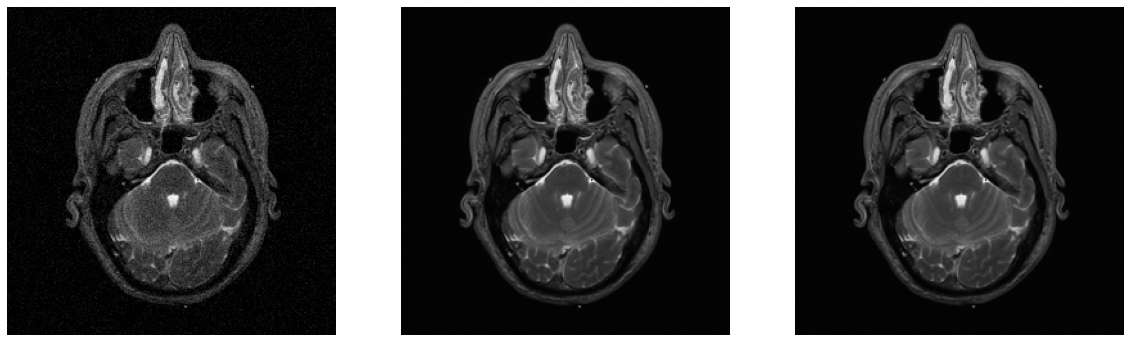

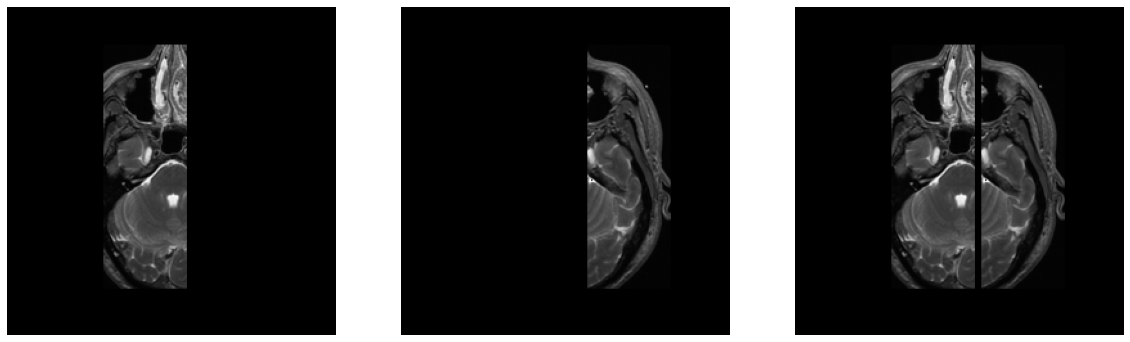

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#A
vid = cv.VideoCapture('MRI-Head.avi')
ret, first_frame = vid.read()
first_frame_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY).astype(np.int32)
#noise = cv.absdiff(img1, first_frame_gray) # Subtracting the images to get noise

vid = cv.VideoCapture('MRI-Head.avi')
frames = []
i = 0
frame_numbers = int(vid.get(cv.CAP_PROP_FRAME_COUNT))  # to get the number of frames
for i in range(frame_numbers):
    ret, frame = vid.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frames.append(gray)
    i += 1

avg_frame = np.average(frames, axis=0).astype(np.uint8)  # axis=0 since it's a list and we want the rows of it
#cv.imshow('Average Frame', avg_frame)
cv.imwrite('Average Frame.png', avg_frame)

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(first_frame_gray, cmap='gray', vmin=0 , vmax = 255)
plt.axis(False)

plt.subplot(1, 3, 2)
plt.imshow(avg_frame, cmap='gray', vmin=0 , vmax = 255)
plt.axis(False)

#B
vid = cv.VideoCapture('MRI-Head.avi')
frame_numbers = int(vid.get(cv.CAP_PROP_FRAME_COUNT))
frames1 = []
for j in range(frame_numbers//2):
    ret1, frame1 = vid.read()
    gray1 = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
    frames1.append(gray1)
    j += 1

avg_frame1 = np.average(frames1, axis=0).astype(np.uint8)  # axis=0 since it's a list and we want the rows of it
plt.subplot(1, 3, 3)
plt.imshow(avg_frame1, cmap='gray', vmin=0 , vmax = 255)
plt.axis(False)

vid.release()

#C
mask1 = np.load('mask1.npy')
mask2 = np.load('mask2.npy')

print(np.min(mask1))
part1 =np.multiply(avg_frame,mask1)
part2 =np.multiply(avg_frame,mask2)
part3 = cv.add(part1, part2)
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(part1 ,cmap='gray')
plt.axis(False)
plt.subplot(1, 3, 2)
plt.imshow(part2, cmap='gray')
plt.axis(False)
plt.subplot(1, 3, 3)
plt.imshow(part3, cmap='gray')
plt.axis(False)